<a href="https://colab.research.google.com/github/JackyPro/AI_Course/blob/main/Perceptron_iris_2class_view_details.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.設定：複製一份程式到自己的雲端上，並且開啟副本

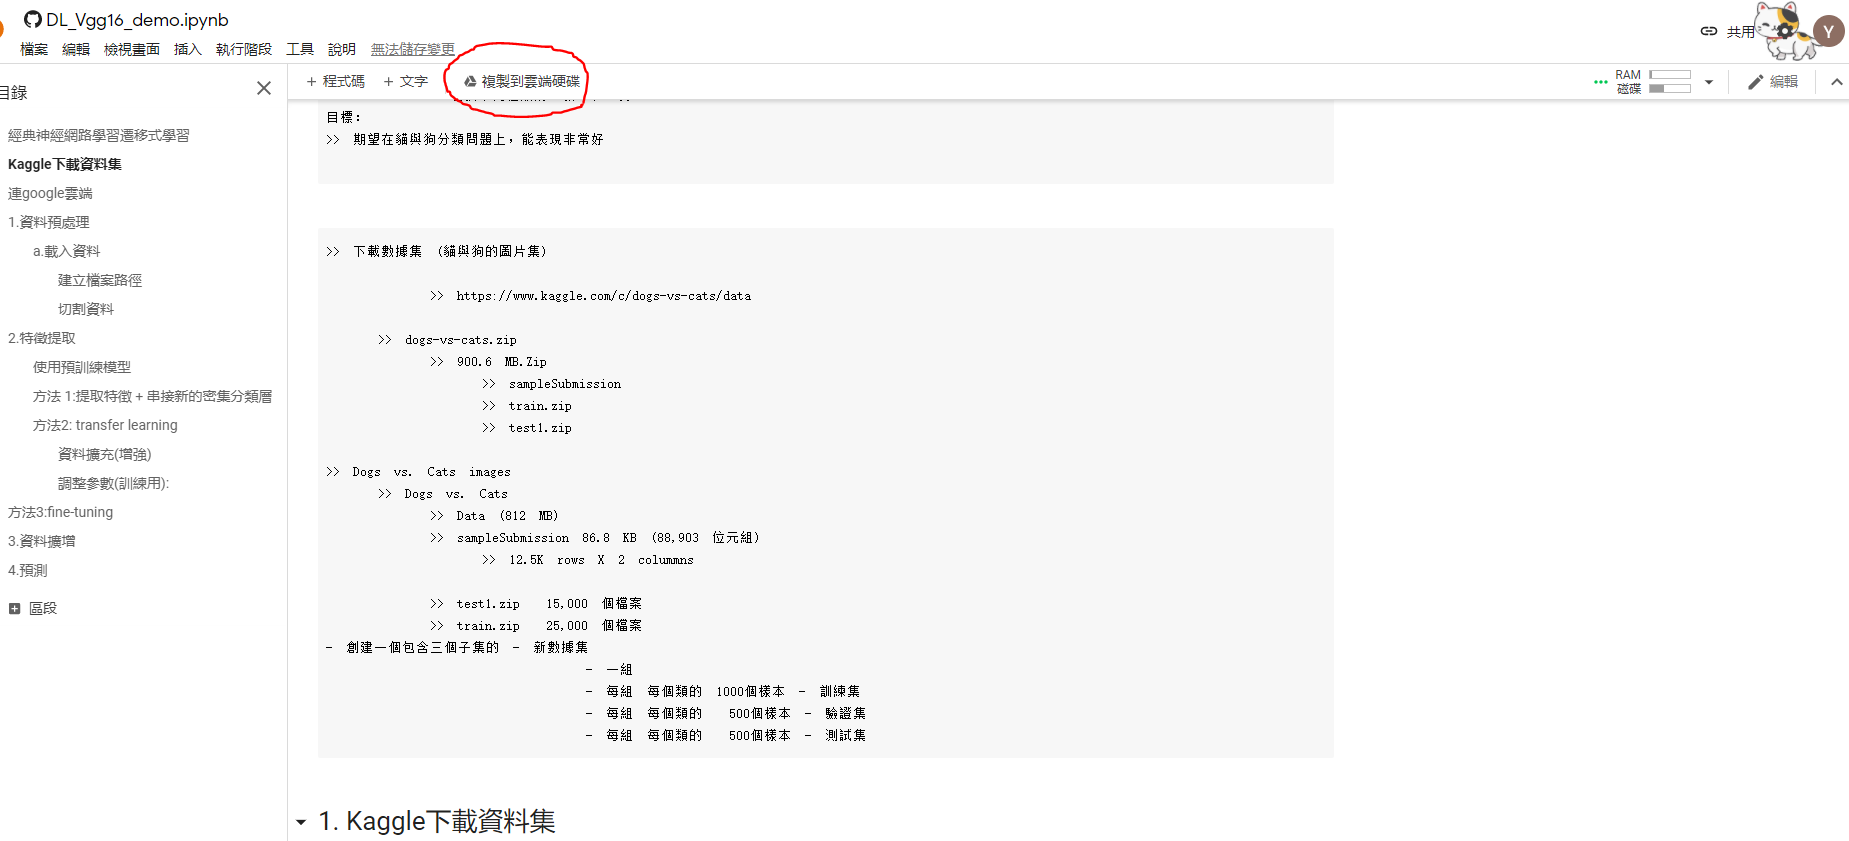

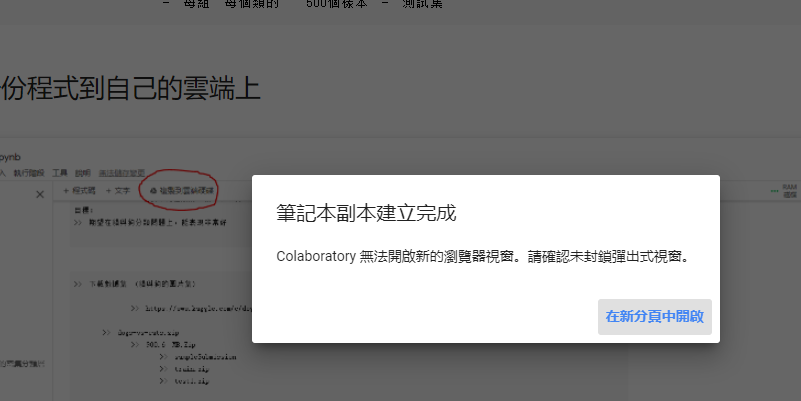

確認是否為副本

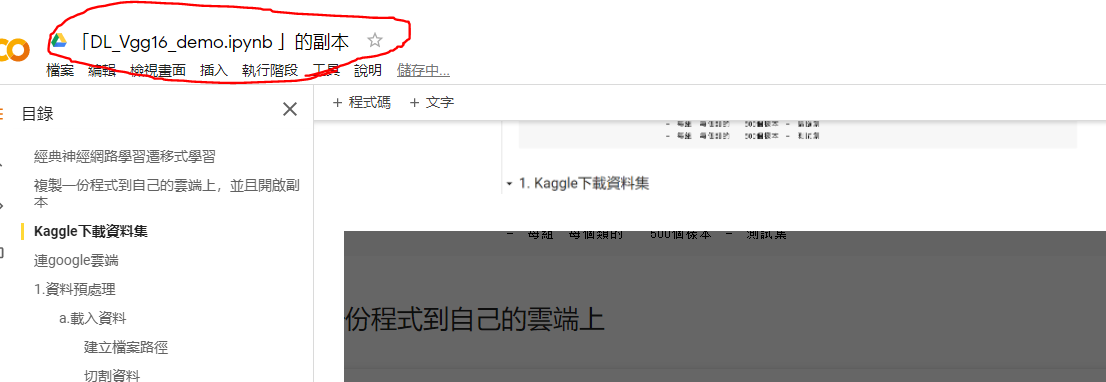

# 2.Envs

In [1]:
from tensorflow.python.client import device_lib
print (device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 14334842521554761517
]


In [2]:
import platform
import tensorflow
import tensorflow.keras
print("Platform: {}".format(platform.platform()))
print("Tensorflow version: {}".format(tensorflow.__version__))
print("Keras version: {}".format(tensorflow.keras.__version__))

Platform: Linux-5.4.104+-x86_64-with-Ubuntu-18.04-bionic
Tensorflow version: 2.5.0
Keras version: 2.5.0


In [3]:
!python -V
platform.python_version()

Python 3.7.11


'3.7.11'

In [4]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"  
os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [5]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
%pwd

'/content'

In [7]:
import numpy as np
import pandas as pd 
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# sci-kit learn
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# 3.Data Pre-processing

## a.load data

In [8]:
# Loading the Iris dataset from scikit-learn
iris = datasets.load_iris()

In [9]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [10]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

## b.data info

In [11]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [12]:
dfx = pd.DataFrame(iris['data'][:100], columns=iris['feature_names'])
dfy = pd.DataFrame(iris['target'][:100], columns=['target'])
df  = pd.concat([dfx, dfy], axis=1)

In [13]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1
96,5.7,2.9,4.2,1.3,1
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1


In [14]:
dff = df
dff['species'] = iris['target'][:100]
#dff
dff['species'] = dff['species'].map({ 0:iris['target_names'][0],
                                    1:iris['target_names'][1], 
                                    2:iris['target_names'][2]})
dff

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1,versicolor
96,5.7,2.9,4.2,1.3,1,versicolor
97,6.2,2.9,4.3,1.3,1,versicolor
98,5.1,2.5,3.0,1.1,1,versicolor


In [15]:
del dff['target']
dff

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,versicolor
96,5.7,2.9,4.2,1.3,versicolor
97,6.2,2.9,4.3,1.3,versicolor
98,5.1,2.5,3.0,1.1,versicolor


In [16]:
dff

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,versicolor
96,5.7,2.9,4.2,1.3,versicolor
97,6.2,2.9,4.3,1.3,versicolor
98,5.1,2.5,3.0,1.1,versicolor


## c.dataset visualization

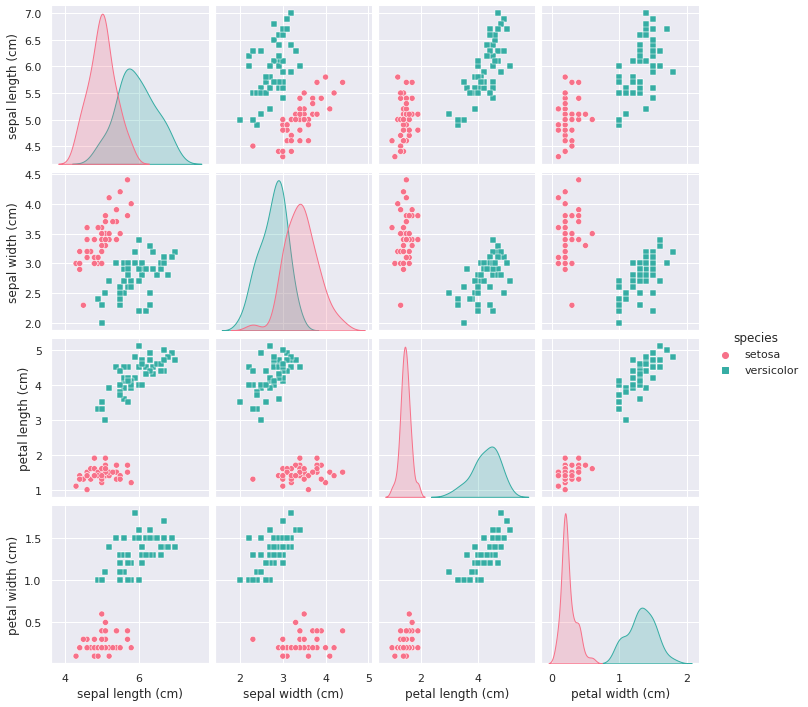

In [17]:
%matplotlib inline
import seaborn as sns; sns.set()

g = sns.pairplot(
                    dff,
                    hue       = 'species',            #根據指定字串做資料分類
                    diag_kind = "kde",                #控制對角線上圖的類型   "hist" / "kde"
                    kind      = "scatter",            #控制非對角線上圖的類型 "reg" / "scatter"
                    palette   = "husl",               #調色
                    markers   = ['o', 's']       #散點的形狀
                )

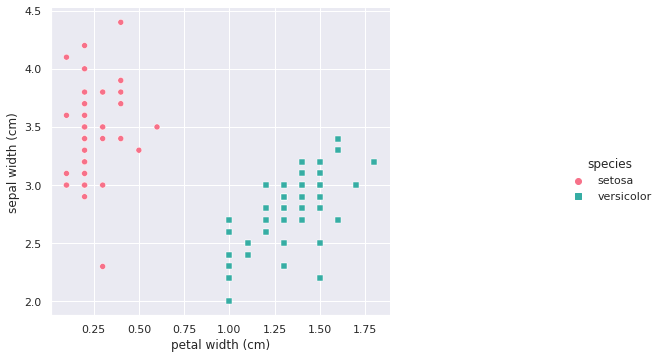

In [18]:
g_=sns.pairplot(
                    dff,
                    x_vars    = [iris.feature_names[3]],
                    y_vars    = [iris.feature_names[1]],
                    hue       = 'species',
                    diag_kind = "kde",
                    palette   = "husl",
                    markers   = ['o', 's']
                )
g_.fig.set_size_inches(10, 6) 

## d.data splitting  
training set : testing set = 8 : 2

In [19]:
x    = iris.data[:100, [0,1]]
y    = iris.target[:100]

class_ = np.unique(y)
print('Class labels: ', class_)

print('class names: ',iris['target_names'][0:2])

Class labels:  [0 1]
class names:  ['setosa' 'versicolor']


In [20]:
# Splitting data into 80% training and 20% test data
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=1, stratify=y)

## e.standardizing

### 說明

In [21]:
sc = StandardScaler()
sc.fit(x)
xx= sc.transform(x)

In [22]:
iris.feature_names[0]

'sepal length (cm)'

In [23]:
xxdf = pd.DataFrame(columns = [iris.feature_names[3][:100], iris.feature_names[1][:100], 'species'])
xxdf[iris.feature_names[3]] = xx[:,0]
xxdf[iris.feature_names[1]] = xx[:,1]
xxdf['species'] = iris['target'][:100]
xxdf['species'] = xxdf['species'].map({ 0:iris['target_names'][0],
                                        1:iris['target_names'][1]})
xxdf

,petal width (cm),sepal width (cm),species
0,-0.581066,0.841837,setosa
1,-0.894309,-0.207835,setosa
2,-1.207552,0.212034,setosa
3,-1.364174,0.002099,setosa
4,-0.737687,1.051772,setosa
...,...,...,...
95,0.358663,-0.207835,versicolor
96,0.358663,-0.417770,versicolor
97,1.141771,-0.417770,versicolor
98,-0.581066,-1.257507,versicolor


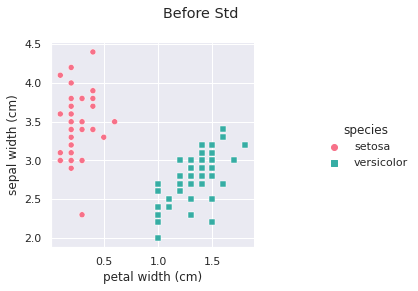

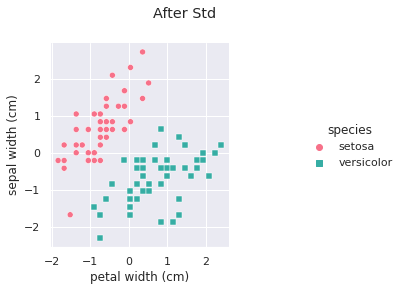

In [24]:
g_ = sns.pairplot(
                    dff,
                    x_vars    = [iris.feature_names[3]],
                    y_vars    = [iris.feature_names[1]],
                    hue       = 'species', 
                    diag_kind = "kde", 
                    palette   = "husl", 
                    markers   = ['o', 's']
                )
g_.fig.set_size_inches(6, 4) 
g_.fig.suptitle("Before Std", y = 1.08)

g_g = sns.pairplot(
                    xxdf,
                    x_vars    = [iris.feature_names[3]],
                    y_vars    = [iris.feature_names[1]],
                    hue       = 'species', 
                    diag_kind = "kde", 
                    palette   = "husl", 
                    markers   = ['o', 's'])
g_g.fig.set_size_inches(6, 4)
g_g.fig.suptitle("After Std", y = 1.08)

plt.show()

### Std

In [25]:
# Standardizing the features
sc = StandardScaler()
sc.fit(x_train)
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)

# 4.Training

In [26]:
# Training
ppn = Perceptron(
                    max_iter      = 10, 
                    eta0          = 0.01,
                    #class_weight = class_weight,
                    random_state  = 1,
                    tol           = None,
                    verbose       = 0
                )
ppn.fit(x_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.01,
           fit_intercept=True, max_iter=10, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=1, shuffle=True, tol=None,
           validation_fraction=0.1, verbose=0, warm_start=False)

# 5.Predict

In [27]:
# Testing
y_pred = ppn.predict(x_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix: \n',cm)

Misclassified samples: 0
Accuracy: 1.00
Confusion Matrix: 
 [[10  0]
 [ 0 10]]


# 6.Training visualization

In [28]:
# Training
ppn1 = Perceptron(
                    max_iter      = 10, 
                    eta0          = 0.1,
                    #class_weight = class_weight,
                    random_state  = 1,
                    tol           = None,
                    n_jobs        = None,
                    shuffle       = True,
                    verbose       = 0,
                    warm_start    = True)

In [29]:
def batch(x, y, n = 1, epoch = 1):
    l       = len(x)                # data長度
    num     = 0                     # batch次數計數器
    max_n   = int(l/n)              # 一次data可以batch的最大次數
    total_n = int((epoch*n)/l) + 1  # 訓練總共需要batch的次數
    
    for t in range(0, total_n, 1):  # 幾輪資料
        #----最後一輪----
        if t == total_n - 1:
            for idx in range(0, l, n): # 0~l筆資料 每n筆抓一次
                if num < ( epoch - max_n * t ):
                    num = num + 1
                    yield x[idx:min(idx + n, l)], y[idx:min(idx + n, l)]
                else:
                    break   
        #----跑完一輪資料----
        else:
            for idx in range(0, l, n): # 0~l筆資料 每n筆抓一次
                yield x[idx:min(idx + n, l)], y[idx:min(idx + n, l)]

In [30]:
print(np.max(x_train[:,0], axis=0))
print(np.min(x_train[:,0], axis=0))
print(np.max(x_train[:,1], axis=0))
print(np.min(x_train[:,1], axis=0))

7.0
4.3
4.2
2.0


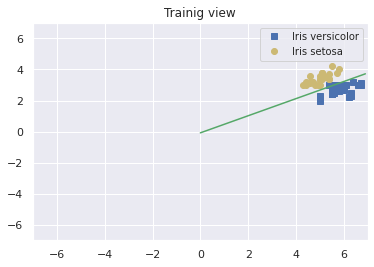

Epoch:  1     Acc:  0.98 %

Model parameters
coef: [[ 0.0673622  -0.12227249]]
bias: [-0.01]


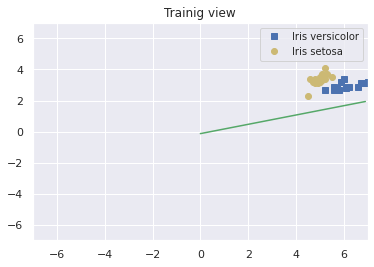

Epoch:  2     Acc:  0.53 %

Model parameters
coef: [[ 0.0453622  -0.15127249]]
bias: [-0.02]


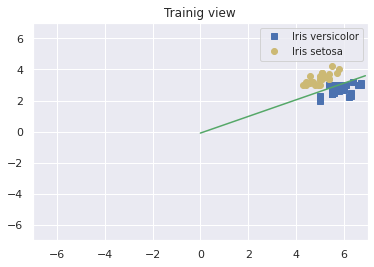

Epoch:  3     Acc:  0.94 %

Model parameters
coef: [[ 0.1093622  -0.20427249]]
bias: [-0.02]


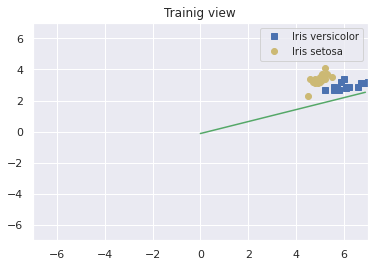

Epoch:  4     Acc:  0.53 %

Model parameters
coef: [[ 0.0913622  -0.23727249]]
bias: [-0.03]


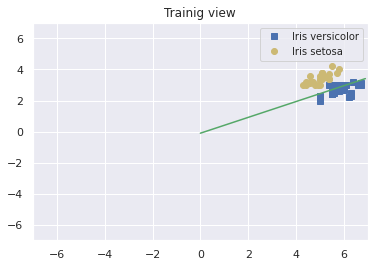

Epoch:  5     Acc:  0.86 %

Model parameters
coef: [[ 0.1453622  -0.28527249]]
bias: [-0.03]


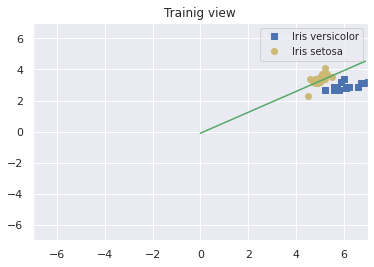

Epoch:  6     Acc:  0.8 %

Model parameters
coef: [[ 0.1923622  -0.28627249]]
bias: [-0.03]


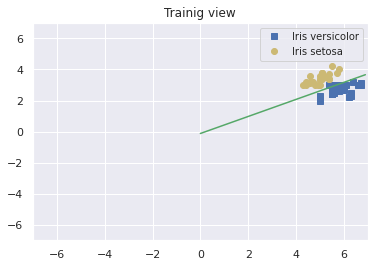

Epoch:  7     Acc:  0.96 %

Model parameters
coef: [[ 0.1773622  -0.32327249]]
bias: [-0.04]


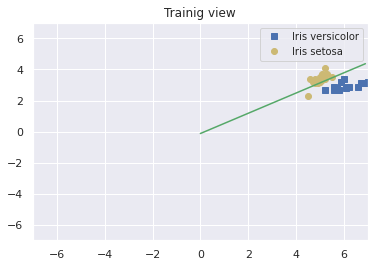

Epoch:  8     Acc:  0.97 %

Model parameters
coef: [[ 0.2073622  -0.31827249]]
bias: [-0.04]


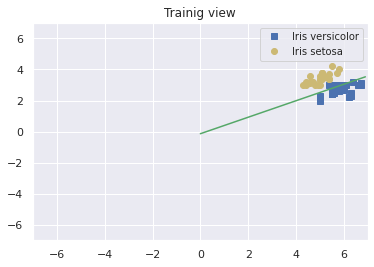

Epoch:  9     Acc:  0.9 %

Model parameters
coef: [[ 0.1923622  -0.36227249]]
bias: [-0.05]


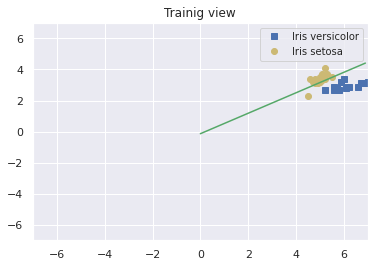

Epoch:  10     Acc:  0.97 %

Model parameters
coef: [[ 0.2393622  -0.36327249]]
bias: [-0.05]


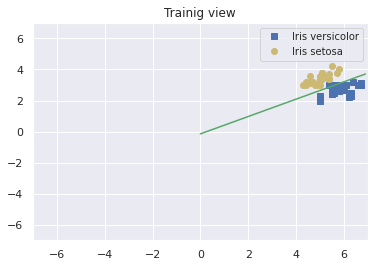

Epoch:  11     Acc:  0.96 %

Model parameters
coef: [[ 0.2263622  -0.40527249]]
bias: [-0.06]


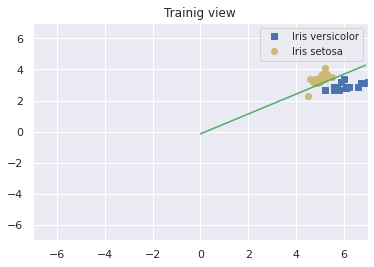

Epoch:  12     Acc:  0.97 %

Model parameters
coef: [[ 0.2563622  -0.40027249]]
bias: [-0.06]


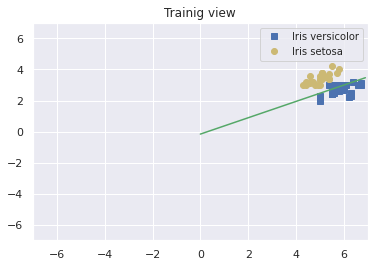

Epoch:  13     Acc:  0.9 %

Model parameters
coef: [[ 0.2273622  -0.43227249]]
bias: [-0.07]


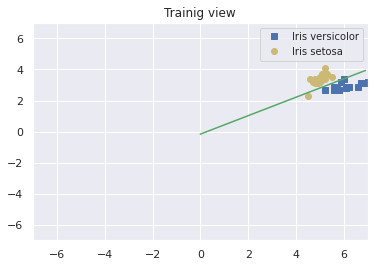

Epoch:  14     Acc:  0.97 %

Model parameters
coef: [[ 0.2543622  -0.42827249]]
bias: [-0.07]


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Epoch = 10
ax, ay = 7, 7
x = np.arange(0, ax, 0.1)
batcherator = batch(x_train, y_train, 50, Epoch)

for i, (xdata, ydata) in enumerate(batcherator):
    ppn.partial_fit(xdata, ydata, classes=class_)

    w = ppn.coef_
    bias = ppn.intercept_

    x0 = -(x*w[0][0]+bias[0])/w[0][1]
    #x1 = -(x*w[1][0]+bias[1])/w[1][1]
    #x2 = -(x*w[2][0]+bias[2])/w[2][1]

    plt.figure(figsize=(6, 4))
    plt.xlim(-ax, ax)
    plt.ylim(-ay, ay)

    #plt.plot(xdata[ydata==2, 0], xdata[ydata==2, 1], "g^", label="Iris virginica")
    plt.plot(xdata[ydata==1, 0], xdata[ydata==1, 1], "bs", label="Iris versicolor")
    plt.plot(xdata[ydata==0, 0], xdata[ydata==0, 1], "yo", label="Iris setosa")
    plt.legend(loc="upper right", fontsize=10)

    plt.plot(x, x0, 'g')
    #plt.plot(x, x1, 'b')
    #plt.plot(x, x2, 'g')
    plt.title('Trainig view')
    plt.show()
    acc = ppn.score(xdata, ydata)

    print('Epoch: ', i+1,'    Acc: ', round(acc, 2),'%')
    print('\nModel parameters' )
    print('coef:', w)
    print('bias:', bias)

In [32]:
# Testing
y_pred = ppn.predict(x_test)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
cm

Misclassified samples: 0
Accuracy: 1.00


array([[10,  0],
       [ 0, 10]])

## a.decision boundary of training set

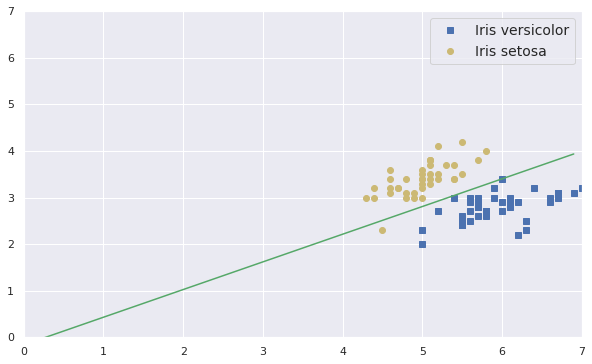

In [33]:
ax, ay = 7, 7
x = np.arange(-ax, ax, 0.1)
y = np.arange(-ay, ay, 0.1)
w = ppn.coef_
bias = ppn.intercept_

x0 = -(x*w[0][0]+bias[0])/w[0][1]
#x1 = -(x*w[1][0]+bias[1])/w[1][1]
#x2 = -(x*w[2][0]+bias[2])/w[2][1]

plt.figure(figsize=(10, 6))
plt.xlim(0, ax)
plt.ylim(0, ay)

xdata = x_train
ydata = y_train
#plt.plot(xdata[ydata==2, 0], xdata[ydata==2, 1], "g^", label="Iris virginica")
plt.plot(xdata[ydata==1, 0], xdata[ydata==1, 1], "bs", label="Iris versicolor")
plt.plot(xdata[ydata==0, 0], xdata[ydata==0, 1], "yo", label="Iris setosa")
plt.legend(loc="upper right", fontsize=14)

plt.plot(x, x0, 'g')
#plt.plot(x, x1, 'b')
#plt.plot(x, x2, 'g')
    

acc = ppn.score(xdata, ydata)
#print('coef:', w)
#print('bias:', bias)
plt.show()

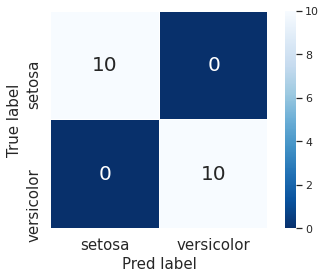

In [34]:
# Plot confusion matrix

target_names = ['setosa', 'versicolor']
conf_m = pd.DataFrame(cm,
            index = target_names,
            columns = target_names)
fig, ax = plt.subplots(figsize = (6, 4))

sns.heatmap(
            conf_m, annot=True, annot_kws={"size": 20},
            cmap='Blues_r', fmt='g', linewidth=0.5, square=True
            )
plt.ylabel('True label', fontsize=15)
plt.xlabel('Pred label', fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
#plt.savefig('cm.png', bbox_inches='tight')
plt.show()

In [35]:
x = [0,2,4,6]
y = [0,1,2,3]
print(x)
print(y)
x, y = np.meshgrid(x, y)
print(x)
print(y)

[0, 2, 4, 6]
[0, 1, 2, 3]
[[0 2 4 6]
 [0 2 4 6]
 [0 2 4 6]
 [0 2 4 6]]
[[0 0 0 0]
 [1 1 1 1]
 [2 2 2 2]
 [3 3 3 3]]


## b.decision boundary of testing set

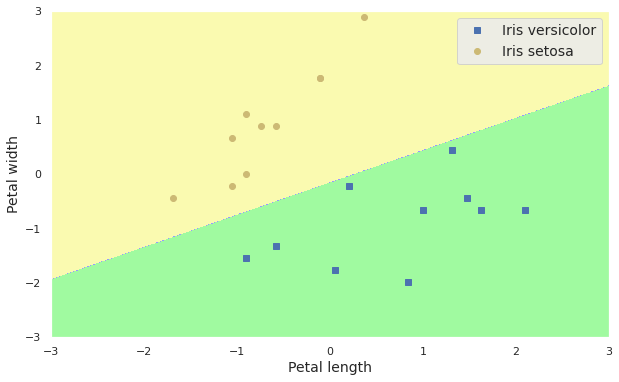

In [36]:
ax, ay = 3, 3
x = np.linspace(-ax, ax, num=500)
#plt.xlim(-ax, ax)
#plt.ylim(-ay, ay)
#X_new = np.c_[x0.ravel(), x1.ravel()]

x0, x1 = np.meshgrid(x, x)
Z = ppn.predict((np.c_[x0.ravel(), x1.ravel()]))
Zz = Z.reshape(x0.shape)
plt.figure(figsize=(10, 6))
#plt.plot(x_test_std[y_test==2, 0], x_test_std[y_test==2, 1], "g^", label="Iris virginica")
plt.plot(x_test_std[y_test==1, 0], x_test_std[y_test==1, 1], "bs", label="Iris versicolor")
plt.plot(x_test_std[y_test==0, 0], x_test_std[y_test==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
plt.contourf(x, x, Zz, alpha=1, cmap=custom_cmap)
#contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
#plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper right", fontsize=14)
#plt.axis([0, 7, 0, 3.5])
#save_fig("softmax_regression_contour_plot")
plt.show()

In [37]:
ppn.coef_

array([[ 0.2543622 , -0.42827249]])

In [38]:
ppn.intercept_

array([-0.07])